In the case of monoester metabolites, two PMFs were calculated, both for the neutral (protonated) and charged (deprotonated) forms, and from them the weighted average was calculated which is used in the calculations of permeability. The weighted average for $\Delta G(z)$ is given by:
$$\Delta G(z) = \Delta G(z)_P\frac{e^{\frac{-\Delta G(z)_P}{RT}}}{Q(z)} + \Delta G(z)_{PH}\frac{e^{\frac{-\Delta G(z)_{PH}}{RT}}}{Q(z)}$$
where, $Q(z)$ is the sum of two states given by, $$Q(z) = e^{\frac{-\Delta G(z)_P}{RT}} + e^{\frac{-\Delta G(z)_{PH}}{RT}}$$
Here, $\Delta G(z)_P$ is the PMF of the charged (deprotonated) phthalate and $\Delta G(z)_{PH}$ is the PMF of the uncharged (protonated) phthalate calculated for every $z$.

In [2]:
# The weighted average of the PMF is already done and is saved in xvg files with small letter names like 
# midp-midph.xvg

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz, simps #Importing trapz, and simps module from scipy for numerical integration


In [4]:
pmf_midp_midph = pd.read_csv('midp-midph.xvg', header = None, delim_whitespace=True)

In [5]:
# Checking the few data from pmf_midp_midph # Note, there are no error bars in here
pmf_midp_midph.head()

,0,1
0,0.005007,-10.516287
1,0.015021,-10.599797
2,0.025035,-10.749347
3,0.035049,-10.884686
4,0.045063,-11.138086


In [6]:
# Extrapolating for the data at 0
df = pd.DataFrame({0: [0.000000], 1: -10.516287})
df = df.append(pmf_midp_midph)
df = df.reset_index(drop=True)

In [7]:
# Just making a copy to have same name as original
pmf_midp_midph = df.copy(deep=True)

In [8]:
pmf_midp_midph.head()

,0,1
0,0.000000,-10.516287
1,0.005007,-10.516287
2,0.015021,-10.599797
3,0.025035,-10.749347
4,0.035049,-10.884686


In [9]:
# We don't want the values of z distance above 4, so
pmf_midp_midph = pmf_midp_midph[pmf_midp_midph[0] <= 4.000000]

In [10]:
pmf_midp_midph.tail()

,0,1
395,3.950529,-0.060531
396,3.960543,-0.028826
397,3.970557,0.016891
398,3.980571,0.005322
399,3.990585,-0.027244


In [11]:
# Just extrapolating to have the same value in z = 4 nm as in z = 3.990585
pmf_midp_midph = pmf_midp_midph.append({0: 4.000000, 1: -0.027244468}, ignore_index = True)

In [13]:
pmf_midp_midph.tail()

,0,1
396,3.960543,-0.028826
397,3.970557,0.016891
398,3.980571,0.005322
399,3.990585,-0.027244
400,4.000000,-0.027244


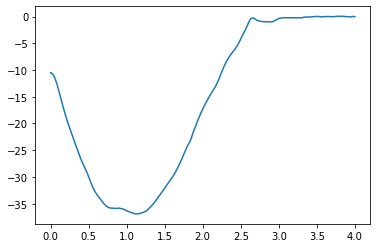

In [14]:
# Now, check a rough plot for free energy
plt.plot(pmf_midp_midph[0], pmf_midp_midph[1])

Now adding a $e^\frac{\Delta G}{RT}$ component in the last column of our PMF data. Here, $\Delta G$ is obtained from the second column pmf_midp_midph[1] and RT is 2.478 KJ/mol at 298K.

In [15]:
pmf_midp_midph[2] = np.exp(pmf_midp_midph[1]/2.478)

In [16]:
pmf_midp_midph

,0,1,2
0,0.000000,-10.516287,0.014352
1,0.005007,-10.516287,0.014352
2,0.015021,-10.599797,0.013876
3,0.025035,-10.749347,0.013064
4,0.035049,-10.884686,0.012369
...,...,...,...
396,3.960543,-0.028826,0.988435
397,3.970557,0.016891,1.006840
398,3.980571,0.005322,1.002150
399,3.990585,-0.027244,0.989066


In [17]:
# Just checking some values in the last column if it makes sense
np.exp(-0.027244/2.478)
# So, here the last column index 2 contains the values of the numerator of our integrand that we want to integrate

0.9890658667023333

### Weighted average of Diffusion coefficient for monoisodecyl phthalate (MIDP)

Similarly for diffusion coefficient, the weighted average for $D(z)$ is given by:
$$D(z) = D(z)_P\frac{e^{\frac{-\Delta G(z)_P}{RT}}}{Q(z)} + D(z)_{PH}\frac{e^{\frac{-\Delta G(z)_{PH}}{RT}}}{Q(z)}$$
where, $Q(z)$ is the sum of two states given by, $$Q(z) = e^{\frac{-\Delta G(z)_P}{RT}} + e^{\frac{-\Delta G(z)_{PH}}{RT}}$$
Here, $\Delta G(z)_P$ is the PMF of the charged (deprotonated) phthalate and $\Delta G(z)_{PH}$ is the PMF of the uncharged (protonated) phthalate calculated for every $z$.

So, for the weighted average of Diffusion coefficient, we need the free energy of both the charged(deprotonated(P)) and uncharged (protonated(PH)) phthalate

In [18]:
# Here, the pmf for both charged and uncharged monoester metabolites are given by the xvg files with their usual names
# Like 6-MIDP.xvg, 6-MIDPH.xvg

In [19]:
pmf_midp =  pd.read_csv('6-MIDP.xvg', header = None, delim_whitespace=True)
pmf_midph = pd.read_csv('6-MIDPH.xvg', header = None, delim_whitespace=True)

In [20]:
pmf_midp.head()

,0,1
0,0.005007,30.49231
1,0.015021,30.25589
2,0.025035,29.87711
3,0.035049,29.40022
4,0.045063,28.78913


In [21]:
pmf_midph.head()

,0,1
0,0.005026,-10.51629
1,0.015078,-10.59980
2,0.025130,-10.74935
3,0.035182,-10.88469
4,0.045233,-11.13809


In [22]:
# Extrapolating for the data at 0 for both
df = pd.DataFrame({0: [0.000000], 1: 30.49231})
df = df.append(pmf_midp)
df = df.reset_index(drop=True)

In [23]:
# Just making a copy to have same name as original
pmf_midp = df.copy(deep=True)

In [24]:
pmf_midp.head()

,0,1
0,0.000000,30.49231
1,0.005007,30.49231
2,0.015021,30.25589
3,0.025035,29.87711
4,0.035049,29.40022


In [25]:
# We don't want the values of z distance above 4, so
pmf_midp = pmf_midp[pmf_midp[0] <= 4.000000]

In [26]:
pmf_midp.tail()

,0,1
395,3.950529,-0.069026
396,3.960543,-0.037444
397,3.970557,0.008044
398,3.980571,-0.003486
399,3.990585,-0.036008


In [27]:
# Just extrapolating to have the same value in z = 4 nm as in z = 3.990585
pmf_midp = pmf_midp.append({0: 4.000000, 1: -0.036008}, ignore_index = True)

In [28]:
pmf_midp.tail()

,0,1
396,3.960543,-0.037444
397,3.970557,0.008044
398,3.980571,-0.003486
399,3.990585,-0.036008
400,4.000000,-0.036008


In [29]:
# Similarly for midph,
# Extrapolating for the data at 0 for both
df = pd.DataFrame({0: [0.000000], 1: -10.51629})
df = df.append(pmf_midph)
df = df.reset_index(drop=True)
# Just making a copy to have same name as original
pmf_midph = df.copy(deep=True)

In [31]:
pmf_midph.head()

,0,1
0,0.000000,-10.51629
1,0.005026,-10.51629
2,0.015078,-10.59980
3,0.025130,-10.74935
4,0.035182,-10.88469


In [32]:
# We don't want the values of z distance above 4, so
pmf_midph = pmf_midph[pmf_midph[0] <= 4.000000]

In [33]:
pmf_midph.tail()

,0,1
394,3.955414,19.042615
395,3.965466,19.066811
396,3.975517,19.057385
397,3.985569,19.028376
398,3.995621,19.029281


In [34]:
# Just extrapolating to have the same value in z = 4 nm as in z = 3.995621
pmf_midph = pmf_midph.append({0: 4.000000, 1: 19.029281}, ignore_index = True)

In [35]:
pmf_midph

,0,1
0,0.000000,-10.516290
1,0.005026,-10.516290
2,0.015078,-10.599800
3,0.025130,-10.749350
4,0.035182,-10.884690
...,...,...
395,3.965466,19.066811
396,3.975517,19.057385
397,3.985569,19.028376
398,3.995621,19.029281


In [37]:
pmf_midp

,0,1
0,0.000000,30.492310
1,0.005007,30.492310
2,0.015021,30.255890
3,0.025035,29.877110
4,0.035049,29.400220
...,...,...
396,3.960543,-0.037444
397,3.970557,0.008044
398,3.980571,-0.003486
399,3.990585,-0.036008


In [38]:
pmf_midp_midph

,0,1,2
0,0.000000,-10.516287,0.014352
1,0.005007,-10.516287,0.014352
2,0.015021,-10.599797,0.013876
3,0.025035,-10.749347,0.013064
4,0.035049,-10.884686,0.012369
...,...,...,...
396,3.960543,-0.028826,0.988435
397,3.970557,0.016891,1.006840
398,3.980571,0.005322,1.002150
399,3.990585,-0.027244,0.989066


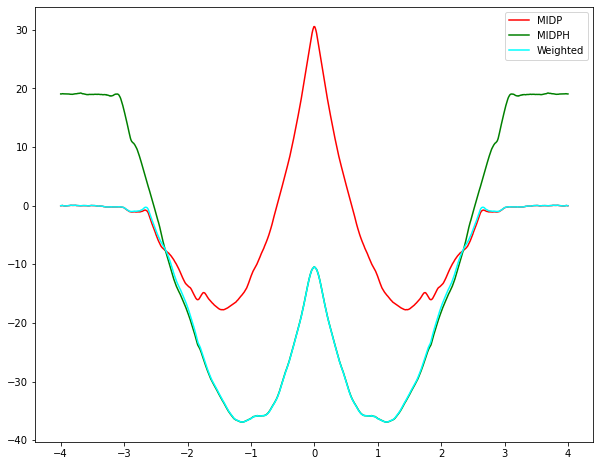

In [40]:
# Now, check a rough plot for free energy
plt.figure(figsize = (10,8))
plt.plot(pmf_midp[0], pmf_midp[1], color = 'r', label = 'MIDP')
plt.plot(-pmf_midp[0], pmf_midp[1], color = 'r')
plt.plot(pmf_midph[0], pmf_midph[1], color = 'g', label = 'MIDPH')
plt.plot(-pmf_midph[0], pmf_midph[1], color = 'g')
plt.plot(pmf_midp_midph[0], pmf_midp_midph[1], color = 'cyan', label = 'Weighted')
plt.plot(-pmf_midp_midph[0], pmf_midp_midph[1], color = 'cyan')

plt.legend()

In [41]:
diff_midp = pd.read_csv('MIDP_dif.txt', header = None, delim_whitespace=True)
diff_midph = pd.read_csv('MIDPH_dif.txt', header = None, delim_whitespace = True)

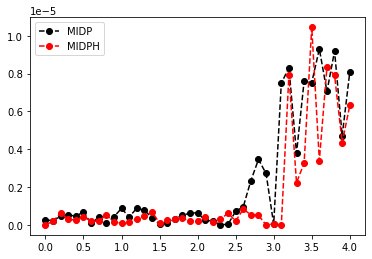

In [42]:
# Plotting both diffusion coefficients
plt.plot(diff_midp[0], diff_midp[1], '--o', color = 'k', label = 'MIDP')
plt.plot(diff_midph[0], diff_midph[1], '--o', color = 'r', label = 'MIDPH')
plt.legend()

In [46]:
any(pmf_midp_midph[0] == pmf_midp[0]) # As the z distance of mehp, and the weighted average midp_midph is same, 
# we can interpolate on either of them

True

In [47]:
diff_midp_inter = np.interp(pmf_midp[0], diff_midp[0], diff_midp[1])
diff_midph_inter = np.interp(pmf_midp[0],diff_midph[0], diff_midph[1])

In [48]:
len(diff_midp_inter)

401

In [49]:
len(diff_midph_inter)

401

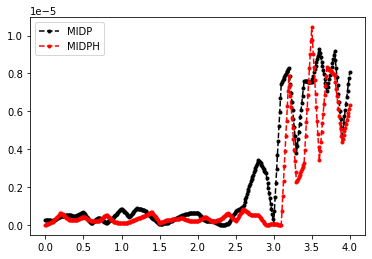

In [50]:
# Plot both to check the interpolated values if it makes sense or not
plt.plot(pmf_midp[0], diff_midp_inter, '--.', color = 'k', label = 'MIDP')
plt.plot(pmf_midp[0], diff_midph_inter, '--.', color = 'r', label = 'MIDPH')
plt.legend()
# It does with many data points

In [51]:
pmf_midp_midph[0].head()

0    0.000000
1    0.005007
2    0.015021
3    0.025035
4    0.035049
Name: 0, dtype: float64

In [52]:
pmf_midp[0].head()

0    0.000000
1    0.005007
2    0.015021
3    0.025035
4    0.035049
Name: 0, dtype: float64

In [53]:
pmf_midph[0].head()

0    0.000000
1    0.005026
2    0.015078
3    0.025130
4    0.035182
Name: 0, dtype: float64

So, since the z distance of pmf_midph is not same as of pme_midp, and weighted average(pme_midp_midph), we are now interpolating the value of pmf for midph at same z distance as that of midp and the weighted average. Let's make a new dataframe midph with interpolated values for pmf which we can use for our calculations

In [54]:
midph = np.interp(pmf_midp[0], pmf_midph[0], pmf_midph[1])

In [55]:
pmf_midph[1]

0     -10.516290
1     -10.516290
2     -10.599800
3     -10.749350
4     -10.884690
         ...    
395    19.066811
396    19.057385
397    19.028376
398    19.029281
399    19.029281
Name: 1, Length: 400, dtype: float64

In [57]:
pd.Series(midph)

0     -10.516290
1     -10.516290
2     -10.599328
3     -10.747942
4     -10.882906
         ...    
396    19.054961
397    19.062037
398    19.042800
399    19.028828
400    19.029281
Length: 401, dtype: float64

In [61]:
# As you can see, not much of difference between the original values pmf_midph, and the interpolated ones midph
# We can make a plot for both and check if we want

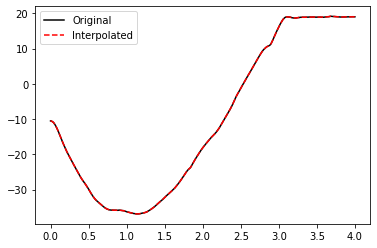

In [64]:
# Plot both
plt.plot(pmf_midph[0], pmf_midph[1], label = 'Original', color = 'k')
plt.plot(pmf_midp[0], midph, '--',label = 'Interpolated', color = 'r')
plt.legend()
# So they coincide, not a difference at all

#### Now, for the weighted average of the diffusion coefficient, we need to make a dataframe where we make a separate columns for distance, free energy of deprotonated(P), free energy of protonated(PH), Diffusion coefficient for deprotonated, Diffusion coefficient for protonated, and finally the the partition function (Q(z)) according to the relation $$D(z) = D(z)_P\frac{e^{\frac{-\Delta G(z)_P}{RT}}}{Q(z)} + D(z)_{PH}\frac{e^{\frac{-\Delta G(z)_{PH}}{RT}}}{Q(z)}$$
where, $Q(z)$ is the sum of two states given by, $$Q(z) = e^{\frac{-\Delta G(z)_P}{RT}} + e^{\frac{-\Delta G(z)_{PH}}{RT}}$$

In [65]:
df_diffusion = pd.DataFrame({'z':pmf_midp[0], 'G_P': pmf_midp[1], 'G_PH': midph, 'D_P': diff_midp_inter, 'D_PH': diff_midph_inter}) 

In [66]:
df_diffusion

,z,G_P,G_PH,D_P,D_PH
0,0.000000,30.492310,-10.516290,2.675727e-07,1.813701e-08
1,0.005007,30.492310,-10.516290,2.658216e-07,2.681732e-08
2,0.015021,30.255890,-10.599328,2.623192e-07,4.417794e-08
3,0.025035,29.877110,-10.747942,2.588169e-07,6.153858e-08
4,0.035049,29.400220,-10.882906,2.553146e-07,7.889920e-08
...,...,...,...,...,...
396,3.960543,-0.037444,19.054961,6.751360e-06,5.538583e-06
397,3.970557,0.008044,19.062037,7.088888e-06,5.735360e-06
398,3.980571,-0.003486,19.042800,7.426416e-06,5.932138e-06
399,3.990585,-0.036008,19.028828,7.763944e-06,6.128916e-06


In [67]:
#Adding a column for Q 
df_diffusion['Q'] = np.exp(-df_diffusion["G_P"]/2.478) + np.exp(-df_diffusion["G_PH"]/2.478)

In [68]:
df_diffusion

,z,G_P,G_PH,D_P,D_PH,Q
0,0.000000,30.492310,-10.516290,2.675727e-07,1.813701e-08,69.676427
1,0.005007,30.492310,-10.516290,2.658216e-07,2.681732e-08,69.676427
2,0.015021,30.255890,-10.599328,2.623192e-07,4.417794e-08,72.050855
3,0.025035,29.877110,-10.747942,2.588169e-07,6.153858e-08,76.504180
4,0.035049,29.400220,-10.882906,2.553146e-07,7.889920e-08,80.786531
...,...,...,...,...,...,...
396,3.960543,-0.037444,19.054961,6.751360e-06,5.538583e-06,1.015683
397,3.970557,0.008044,19.062037,7.088888e-06,5.735360e-06,0.997215
398,3.980571,-0.003486,19.042800,7.426416e-06,5.932138e-06,1.001868
399,3.990585,-0.036008,19.028828,7.763944e-06,6.128916e-06,1.015100


In [69]:
# Adding a column for Diffusion coefficient
df_diffusion['D'] = df_diffusion['D_P'] * (np.exp(-df_diffusion["G_P"]/2.478)/df_diffusion['Q']) + df_diffusion['D_PH'] * (np.exp(-df_diffusion["G_PH"]/2.478)/df_diffusion['Q'])

In [70]:
df_diffusion

,z,G_P,G_PH,D_P,D_PH,Q,D
0,0.000000,30.492310,-10.516290,2.675727e-07,1.813701e-08,69.676427,1.813703e-08
1,0.005007,30.492310,-10.516290,2.658216e-07,2.681732e-08,69.676427,2.681734e-08
2,0.015021,30.255890,-10.599328,2.623192e-07,4.417794e-08,72.050855,4.417796e-08
3,0.025035,29.877110,-10.747942,2.588169e-07,6.153858e-08,76.504180,6.153859e-08
4,0.035049,29.400220,-10.882906,2.553146e-07,7.889920e-08,80.786531,7.889921e-08
...,...,...,...,...,...,...,...
396,3.960543,-0.037444,19.054961,6.751360e-06,5.538583e-06,1.015683,6.750814e-06
397,3.970557,0.008044,19.062037,7.088888e-06,5.735360e-06,0.997215,7.088269e-06
398,3.980571,-0.003486,19.042800,7.426416e-06,5.932138e-06,1.001868,7.425731e-06
399,3.990585,-0.036008,19.028828,7.763944e-06,6.128916e-06,1.015100,7.763200e-06


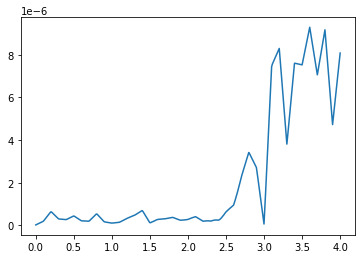

In [71]:
# Plot of weighted average of diffusion coefficient
plt.plot(df_diffusion['z'], df_diffusion['D'])

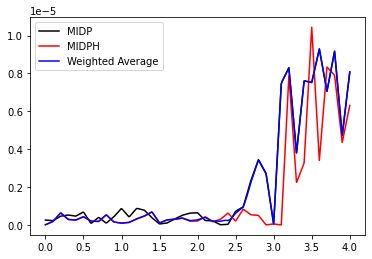

In [73]:
# For checking how identical the plots for diffusion coefficients are -
plt.plot(df_diffusion['z'], df_diffusion['D_P'],label = 'MIDP', color = 'k')
plt.plot(df_diffusion['z'], df_diffusion['D_PH'], label = 'MIDPH',  color = 'r')
plt.plot(df_diffusion['z'], df_diffusion['D'], label = 'Weighted Average', color='b')
plt.legend()
# Here the weighted average is almost identical to MIDP

##### My first approach for the numerical integration will be to convert the distance in z which are in nm into cm for both weighted pmf as well as weighted diffusion coefficient.

In [74]:
# For pmf_dep it will be ---
pmf_midp_midph[0] = pmf_midp_midph[0] * 1 * 10 ** -7
pmf_midp_midph.head()
# Here, the only columns we need to worry about is at the index 0 and 2 which are the values for z-distance in cm,
# exp(Delta G/RT)

,0,1,2
0,0.000000e+00,-10.516287,0.014352
1,5.007009e-10,-10.516287,0.014352
2,1.502102e-09,-10.599797,0.013876
3,2.503504e-09,-10.749347,0.013064
4,3.504905e-09,-10.884686,0.012369


In [75]:
pmf_midp_midph.tail()

,0,1,2
396,3.960543e-07,-0.028826,0.988435
397,3.970557e-07,0.016891,1.006840
398,3.980571e-07,0.005322,1.002150
399,3.990585e-07,-0.027244,0.989066
400,4.000000e-07,-0.027244,0.989066


In [76]:
np.exp(-0.027244/2.478) #just checking values again

0.9890658667023333

In [77]:
df_diffusion['z'] = df_diffusion['z'] * 1 * 10 ** -7
df_diffusion.head()

,z,G_P,G_PH,D_P,D_PH,Q,D
0,0.000000e+00,30.49231,-10.516290,2.675727e-07,1.813701e-08,69.676427,1.813703e-08
1,5.007009e-10,30.49231,-10.516290,2.658216e-07,2.681732e-08,69.676427,2.681734e-08
2,1.502102e-09,30.25589,-10.599328,2.623192e-07,4.417794e-08,72.050855,4.417796e-08
3,2.503504e-09,29.87711,-10.747942,2.588169e-07,6.153858e-08,76.504180,6.153859e-08
4,3.504905e-09,29.40022,-10.882906,2.553146e-07,7.889920e-08,80.786531,7.889921e-08


<AxesSubplot:xlabel='z'>

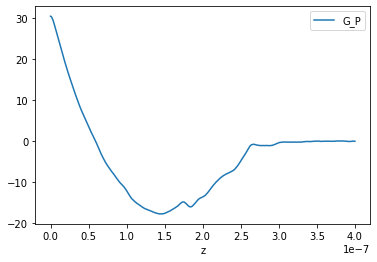

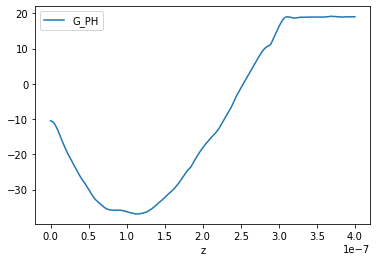

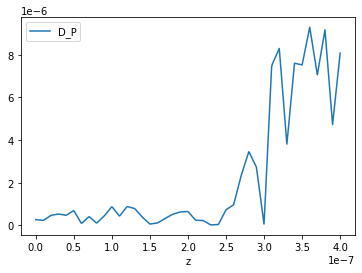

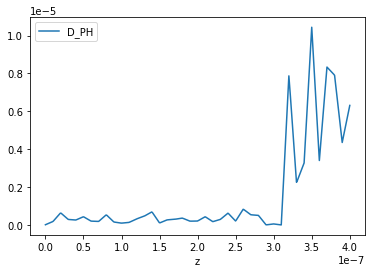

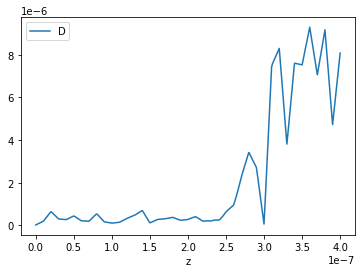

In [78]:
# Play with plots
df_diffusion.plot('z', 'G_P')
df_diffusion.plot('z', 'G_PH')
df_diffusion.plot('z', 'D_P')
df_diffusion.plot('z', 'D_PH')
df_diffusion.plot('z', 'D')

#### Now, we can perform numerical integration with either composite trapezoidal rule, or the simpson's rule

$$\int_{0}^{4 \times 10 ^{-7}} \frac{\exp\left ( \frac{\Delta G(z)}{RT} \right )}{D(z)} dz$$

In [79]:
#trapz(values of the function to integrate, sample points(z) corresponding to the function values, optional (dz)
#- spacing between the sample points(z))

In [81]:
integrand = pmf_midp_midph[2]/df_diffusion['D']

In [82]:
integrand

0      791313.594579
1      535178.901126
2      314103.712361
3      212285.829436
4      156774.846792
           ...      
396    146417.136154
397    142043.123003
398    134956.438131
399    127404.385049
400    122401.877731
Length: 401, dtype: float64

In [83]:
#Let's check some values of the integrand. For the first value at z = 0,

In [84]:
pmf_midp_midph[1].to_numpy()[0] # This is the pmf

-10.516287

In [85]:
df_diffusion['D'].to_numpy()[0]

1.8137025210188298e-08

In [86]:
#Delta G = -10.516287, RT = 2.478, D(z) = 1.8137025210188298e-08 cm^2/s
np.exp(-10.516287/2.478)/1.8137025210188298e-08

791313.5945793464

In [87]:
integrand[0]

791313.5945793464

In [88]:
trapz(integrand, df_diffusion['z']) # or

0.060047408930172304

In [89]:
trapz(integrand, pmf_midp_midph[0]) # Using the same z - distance 

0.060047408930172304

In [91]:
# The permeability will be 1/integral
1/trapz(integrand, pmf_midp_midph[0]) # in cm/s

16.653507916767502

The calculated value of permeability for monoester(MIDP-MIDPH) is $$16.65\;cm/s$$

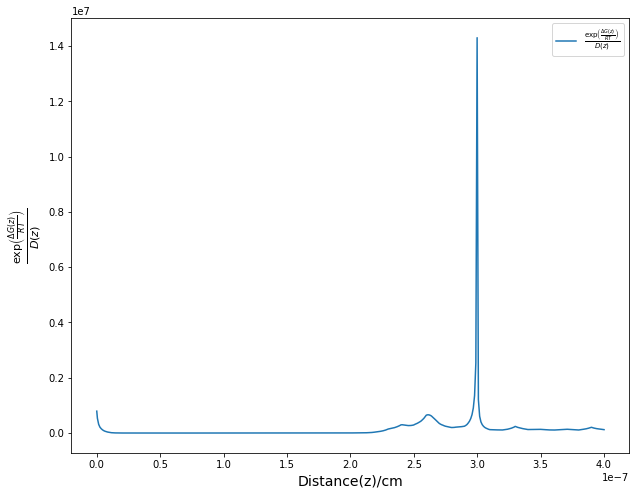

In [92]:
# Let's look at the plot of the integrand
plt.figure(figsize = (10,8))
plt.plot(pmf_midp_midph[0], integrand, label = r'$\frac{\exp\left ( \frac{\Delta G(z)}{RT} \right )}{D(z)}$')
plt.xlabel('Distance(z)/cm', fontsize = 14)
plt.ylabel(r'$\frac{\exp\left ( \frac{\Delta G(z)}{RT} \right )}{D(z)}$', fontsize = 16)
plt.legend()

### Using Simpson's method

In [94]:
1/simps(integrand, pmf_midp_midph[0]) # Not much of a difference in terms of order

17.83467753004883

In [95]:
integ = pd.DataFrame({'0': pmf_midp_midph[0], '1': integrand})

In [96]:
integ

,0,1
0,0.000000e+00,791313.594579
1,5.007009e-10,535178.901126
2,1.502102e-09,314103.712361
3,2.503504e-09,212285.829436
4,3.504905e-09,156774.846792
...,...,...
396,3.960543e-07,146417.136154
397,3.970557e-07,142043.123003
398,3.980571e-07,134956.438131
399,3.990585e-07,127404.385049


In [97]:
# You can also export the data to xmgrace and calculate the area by yourself
integ.to_csv('integrand_midp_midph.xvg', index = False, header = None, sep = ' ')

In [100]:
!xmgrace integrand_midp_midph.xvg #Gives us the same area as the value of our integral computed with trapezoidal rule

#### My another approach for the numerical integration will be to convert diffusion coefficient (cm^2/s) into nm^2/s, integrate it over the distance in nm, and finally convert into cm/s

In [101]:
pmf_midp_midph.head()

,0,1,2
0,0.000000e+00,-10.516287,0.014352
1,5.007009e-10,-10.516287,0.014352
2,1.502102e-09,-10.599797,0.013876
3,2.503504e-09,-10.749347,0.013064
4,3.504905e-09,-10.884686,0.012369


In [102]:
df_diffusion.head()

,z,G_P,G_PH,D_P,D_PH,Q,D
0,0.000000e+00,30.49231,-10.516290,2.675727e-07,1.813701e-08,69.676427,1.813703e-08
1,5.007009e-10,30.49231,-10.516290,2.658216e-07,2.681732e-08,69.676427,2.681734e-08
2,1.502102e-09,30.25589,-10.599328,2.623192e-07,4.417794e-08,72.050855,4.417796e-08
3,2.503504e-09,29.87711,-10.747942,2.588169e-07,6.153858e-08,76.504180,6.153859e-08
4,3.504905e-09,29.40022,-10.882906,2.553146e-07,7.889920e-08,80.786531,7.889921e-08


In [103]:
pmf_midp_midph[0] = pmf_midp_midph[0] * 1 * 10 ** 7
df_diffusion['z'] = df_diffusion['z'] * 1 * 10 ** 7

In [104]:
pmf_midp_midph.head()

,0,1,2
0,0.000000,-10.516287,0.014352
1,0.005007,-10.516287,0.014352
2,0.015021,-10.599797,0.013876
3,0.025035,-10.749347,0.013064
4,0.035049,-10.884686,0.012369


In [105]:
df_diffusion.head()

,z,G_P,G_PH,D_P,D_PH,Q,D
0,0.000000,30.49231,-10.516290,2.675727e-07,1.813701e-08,69.676427,1.813703e-08
1,0.005007,30.49231,-10.516290,2.658216e-07,2.681732e-08,69.676427,2.681734e-08
2,0.015021,30.25589,-10.599328,2.623192e-07,4.417794e-08,72.050855,4.417796e-08
3,0.025035,29.87711,-10.747942,2.588169e-07,6.153858e-08,76.504180,6.153859e-08
4,0.035049,29.40022,-10.882906,2.553146e-07,7.889920e-08,80.786531,7.889921e-08


In [106]:
# Converting diffusion coefficient into nm^2/s and adding it into the last column
df_diffusion['D'] = df_diffusion['D'] * 1 * 10 ** 14

In [107]:
df_diffusion

,z,G_P,G_PH,D_P,D_PH,Q,D
0,0.000000,30.492310,-10.516290,2.675727e-07,1.813701e-08,69.676427,1.813703e+06
1,0.005007,30.492310,-10.516290,2.658216e-07,2.681732e-08,69.676427,2.681734e+06
2,0.015021,30.255890,-10.599328,2.623192e-07,4.417794e-08,72.050855,4.417796e+06
3,0.025035,29.877110,-10.747942,2.588169e-07,6.153858e-08,76.504180,6.153859e+06
4,0.035049,29.400220,-10.882906,2.553146e-07,7.889920e-08,80.786531,7.889921e+06
...,...,...,...,...,...,...,...
396,3.960543,-0.037444,19.054961,6.751360e-06,5.538583e-06,1.015683,6.750814e+08
397,3.970557,0.008044,19.062037,7.088888e-06,5.735360e-06,0.997215,7.088269e+08
398,3.980571,-0.003486,19.042800,7.426416e-06,5.932138e-06,1.001868,7.425731e+08
399,3.990585,-0.036008,19.028828,7.763944e-06,6.128916e-06,1.015100,7.763200e+08


In [109]:
integrand = pmf_midp_midph[2]/df_diffusion['D']

In [110]:
trapz(integrand, pmf_midp_midph[0])

6.004740893017239e-09

In [111]:
1/trapz(integrand, pmf_midp_midph[0]) # This is now in nm/s

166535079.16767478

In [113]:
# Converting into cm/s
1/trapz(integrand, pmf_midp_midph[0]) * 1 * 10 ** -7 # We got the same answer in both ways

16.653507916767477